In [1]:
import matplotlib.pyplot as plt
from pickle import load, dump
import numpy as np
from scipy.stats import t
import os
from matplotlib import ticker


path = os.getcwd()

# Original Results

In [2]:

K = {}
for sc in range(25):
    file = open(path+f"/Data/K/K_sc{sc}","rb")
    K[sc] = len(load(file)); file.close()

configs = {}
for i in range(31):
    file = open(path+f"/Results/Configurations/Objectives/objs_{i}","rb")
    configs[i] = load(file)
    


In [3]:
''' Configs plot '''
def plot_configs(data,K,SL=None,conf_level=0.95):
    feasible = []

    fig, ax = plt.subplots(figsize=(8,5))
    
    costs = [i*0.0025 for i in range(31)]
    for c in range(31):
        
        sls = np.array([(K[sc]-data[c][sc][1])/K[sc] for sc in range(25)])
        mu = np.mean(sls); sigma = np.std(sls,ddof=1)

        if mu >= 1:
            col="gold"; mark = "D"; feasible.append(c)
        else:
            col = "darkmagenta"; mark = "o"
            df = 25-1
            sem = sigma/5
            ci_lower, ci_upper = t.interval(conf_level, df, loc=mu, scale=sem)
            ax.vlines(x=[costs[c]],ymin=ci_lower,ymax=ci_upper,color=col)

        ax.plot(costs[c],mu,linestyle="",marker=mark,color=col)
    
    ax.set_ylabel("Expected Service Level", fontsize=14, fontname="Century Gothic")
    ax.set_xlabel("\nExpected driving and charging cost \n relative to minimum cost stations configuration",fontsize=14,fontname="Century Gothic")

    for tick in ax.get_xticklabels(): tick.set_fontname("Cambria")
    for tick in ax.get_yticklabels(): tick.set_fontname("Cambria")

    ax.set_xlim(-0.002,0.077)
    ax.set_ylim(0.989, 1.001)

    xticks = [i*0.0025 for i in range(0,31,5)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(["{:.2%}".format(i) for i in xticks],fontsize=14)

    yticks = [0.98+i/1000 for i in range(0,21,2)]
    ax.set_yticks(yticks)
    ax.set_yticklabels(["{:.1%}".format(i) for i in yticks],fontsize=14)

    return feasible
    

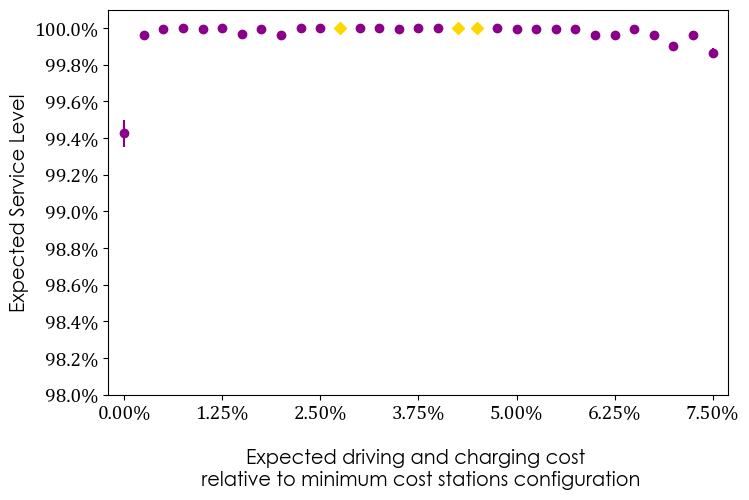

In [4]:
feasible = plot_configs(configs,K)

In [6]:
open_stats = {}
stress_ix = {}
coverage = {}

for i in range(31):
    file = open(path + f"/Results/Configurations/Open Stations/open_stations_{i}", "rb")
    open_stats[i] = load(file); file.close()

    file = open(path + f"/Results/Configurations/Stress Index/stress_index_{i}", "rb")
    stress_ix[i] = load(file); file.close()

    file = open(path + f"/Results/Configurations/Coverage/coverage_{i}", "rb")
    coverage[i] = load(file); file.close()


In [11]:
def plot_coverage(coverage,feasible,conf_level=0.95):
    fig, ax = plt.subplots(figsize=(8,5))
    
    for i in range(31):
        stress = [coverage[i][sc] for sc in range(25)]
        mu = np.mean(stress); sigma = np.std(stress, ddof=1)
        df = 25-1
        sem = sigma/5
        ci_lower, ci_upper = t.interval(conf_level, df, loc=mu, scale=sem)

        if i in feasible:
            mark = "D"; col = "gold"
        else:
            mark = "o"; col = "navy"

        ax.plot(i*0.0025,mu,marker=mark,color=col)
        ax.vlines(x=i*0.0025,ymin=ci_lower,ymax=ci_upper,color=col)

    
    ax.set_ylabel("Expected Average Vehicle Coverage", fontsize=14, fontname="Century Gothic")
    ax.set_xlabel("\nExpected driving and charging cost \n relative to minimum cost stations configuration",fontsize=14,fontname="Century Gothic")

    for tick in ax.get_xticklabels(): tick.set_fontname("Cambria")
    for tick in ax.get_yticklabels(): tick.set_fontname("Cambria")

    ax.set_xlim(-0.002,0.077)
    #ax.set_ylim(0.989, 1.001)

    xticks = [i*0.0025 for i in range(0,31,5)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(["{:.1%}".format(i) for i in xticks],fontsize=14)

    ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)

C:\Users\ari_r\AppData\Local\Temp\ipykernel_3172\1750235192.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


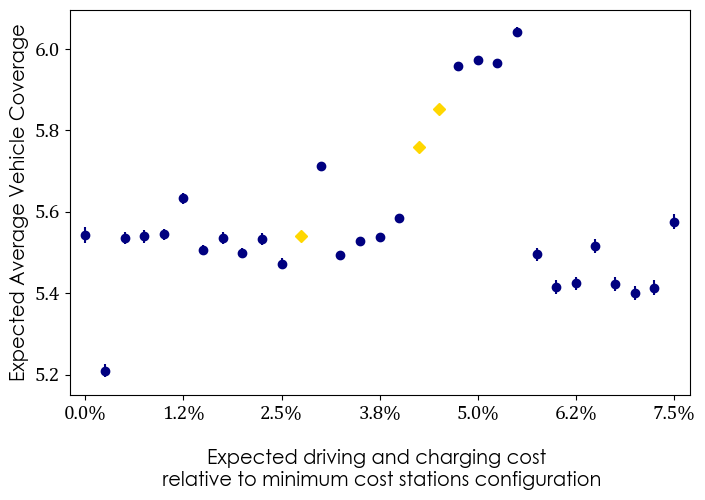

In [12]:
plot_coverage(coverage,feasible)

In [9]:
def violin_plots_stations(config1,config2,mi=None):
    
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,8))
    
    cols = {0:["deepskyblue","navy"],1:["greenyellow","olivedrab"],2:["gold","darkgoldenrod"],3:["darkorange","saddlebrown"],4:["hotpink","mediumvioletred"]}

    violins = {}
    col = 1

    stress = [sum(stress_ix[config1][sc][s] for sc in range(25))/25 for s in open_stats[config1]]
    violins[0] = ax.violinplot(dataset=stress,positions=[0],quantiles=[0.25,0.5,0.75],widths=[1.2],showextrema=False)
    
    ax.set_xticklabels([f"{sc}" for sc in range(25)])
    ax.set_ylabel("Number of feasible vehicles")
    
    violins[0]["bodies"][0].set_facecolor(cols[col][0])
    violins[0]["bodies"][0].set_edgecolor(cols[col][1])
    violins[0]["cquantiles"].set_edgecolor(cols[col][1])
    for b in violins[0]["bodies"]:
        m = np.mean(b.get_paths()[0].vertices[:,0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
    for i in range(3):
        m = np.mean(violins[0]["cquantiles"].get_paths()[i].vertices[:,0])
        violins[0]["cquantiles"].get_paths()[i].vertices[:, 0] = np.clip(violins[0]["cquantiles"].get_paths()[i].vertices[:, 0], m, np.inf)

    col = 4
    stress = [sum(stress_ix[config2][sc][s] for sc in range(25))/25 for s in open_stats[config2]]
    violins[0] = ax.violinplot(dataset=stress,positions=[0],quantiles=[0.25,0.5,0.75],widths=[1.2],showextrema=False)
    
    ax.set_xticks([])
    ax.set_ylabel("Expected number of feasible vehicles by station",fontsize=14,fontname="Century Gothic")
    
    violins[0]["bodies"][0].set_facecolor(cols[col][0])
    violins[0]["bodies"][0].set_edgecolor(cols[col][1])
    violins[0]["cquantiles"].set_edgecolor(cols[col][1])
    for b in violins[0]["bodies"]:
        m = np.mean(b.get_paths()[0].vertices[:,0])
        b.get_paths()[0].vertices[:, 0] = np.clip(-np.inf,m,b.get_paths()[0].vertices[:, 0])
    for i in range(3):
        m = np.mean(violins[0]["cquantiles"].get_paths()[i].vertices[:,0])
        violins[0]["cquantiles"].get_paths()[i].vertices[:, 0] = np.clip(-np.inf,m,violins[0]["cquantiles"].get_paths()[i].vertices[:, 0])

    ax.set_yticklabels(ax.get_yticklabels(),fontsize=14,fontname="Cambria")

    return ax




C:\Users\ari_r\AppData\Local\Temp\ipykernel_3172\368011317.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{sc}" for sc in range(25)])
C:\Users\ari_r\AppData\Local\Temp\ipykernel_3172\368011317.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14,fontname="Cambria")


<AxesSubplot: ylabel='Expected number of feasible vehicles by station'>

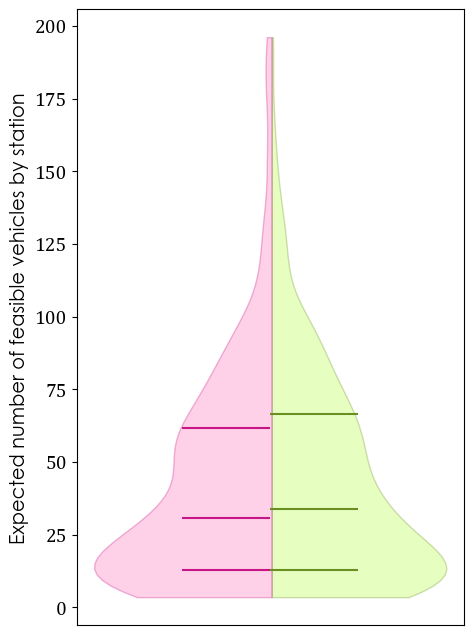

In [10]:
violin_plots_stations(18,0)


# MultiObjective Results

In [2]:
epsilons = [0.0,0.00005,0.00055,0.00165,0.0033,0.005,0.007,0.01,0.0125,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095,0.1,0.105,0.11,0.115,0.12,0.125,0.13,0.135,0.14,0.145,0.15,0.155,0.16,0.165,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.3434633262557294]

In [3]:
cov = dict(); cost = dict(); objs = dict()
for e in epsilons:
    file = open(path+f"/Multiobjective/Configurations/Costs/costs_{e}","rb")
    cost[e] = load(file); file.close()

    file = open(path+f"/Multiobjective/Configurations/Coverage/coverage_{e}","rb")
    covs = load(file); file.close()
    cov[e] = sum(covs.values())/25

    file = open(path+f"/Multiobjective/Configurations/Objectives/objs_{e}","rb")
    objs[e] = load(file); file.close()


In [4]:
cov[0.3434633262557294]

5.663558926443106

In [5]:
cov[0.0]/cov[0.3434633262557294]

1.5228205162625499

In [6]:
def plot_pareto_frontier(cov,cost,objs):

    feasibles = list()
    min_cost = cost[0.3434633262557294]
    
    fig, ax = plt.subplots(figsize=(8,4),nrows=1,ncols=1)

    for e in epsilons:
        infeasible = sum(objs[e][sc][1] for sc in range(25))
        if infeasible == 0: col = "goldenrod"; mark = "D"; feasibles.append(e)
        else: col = "steelblue"; mark = "o"
        ax.plot(cov[e],cost[e]/min_cost,marker=mark,color=col,linestyle="",markersize=5)
    
    ax.set_ylim(0.995,1.04)
    ticks = [i/1000 for i in range(1000,1036,5)]
    ax.set_yticks(ticks); ax.set_yticklabels([f"{round(i*100,1)}%" for i in ticks],fontname="Cambria",fontsize=12)
    ax.set_xlim(5.5,8.75)
    ticks = [i/10 for i in range(60,86,5)]
    ax.set_xticks(ticks); ax.set_xticklabels(ticks,fontname="Cambria",fontsize=12)

    ax.plot(0,0,marker="D",color="goldenrod",linestyle="",label="Feasible",markersize=6)
    ax.plot(0,0,marker="o",color="steelblue",linestyle="",label="Infeasible",markersize=6)
    
    L = ax.legend(loc="lower right",fontsize=14,labelspacing=0.5,handletextpad=0.1)
    plt.setp(L.texts, family="Times New Roman")

    ax.set_ylabel("Expected Driving\nand Charging Cost",fontsize=14,fontname="Times New Roman")
    ax.set_xlabel("Expected Average Coverage by Vehicle",fontsize=14,fontname="Times New Roman")

    plt.savefig(path+f"/Results/Station Configurations.png",dpi=300,bbox_inches="tight")

    return feasibles

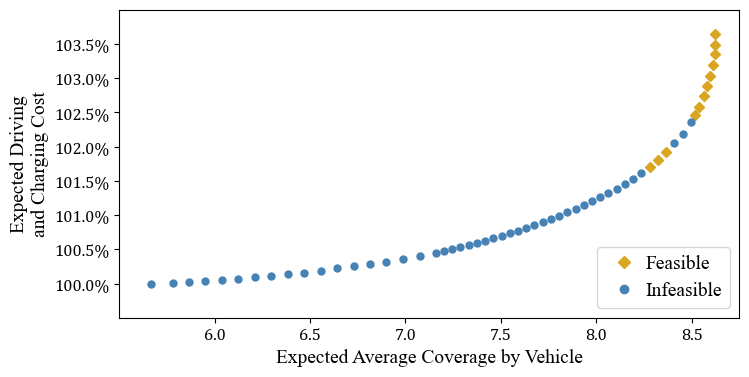

In [7]:
feasibles = plot_pareto_frontier(cov,cost,objs)

In [9]:
for config in feasibles:
    print("Cost: ", cost[config], f"({round(100*cost[config]/cost[0.3434633262557294],2)}%)", "Coverage: ", cov[config], f"({round(100*cov[config]/cov[0.3434633262557294],2)}%)",  sep="\t")

Cost: 	4372.012071486313	(103.65%)	Coverage: 	8.624583728249464	(152.28%)
Cost: 	4365.204190662568	(103.49%)	Coverage: 	8.624177116934408	(152.27%)
Cost: 	4359.424536263729	(103.35%)	Coverage: 	8.619958133741157	(152.2%)
Cost: 	4352.771748967287	(103.2%)	Coverage: 	8.61050086537217	(152.03%)
Cost: 	4345.775890964085	(103.03%)	Coverage: 	8.59617259249997	(151.78%)
Cost: 	4339.694379384304	(102.89%)	Coverage: 	8.58153647863353	(151.52%)
Cost: 	4333.706034480488	(102.74%)	Coverage: 	8.564283293189066	(151.22%)
Cost: 	4326.660918135202	(102.58%)	Coverage: 	8.538778172813913	(150.77%)
Cost: 	4322.004787507009	(102.47%)	Coverage: 	8.517081046052354	(150.38%)
Cost: 	4298.876413654481	(101.92%)	Coverage: 	8.365896481793932	(147.71%)
Cost: 	4294.093839069436	(101.8%)	Coverage: 	8.32278609185912	(146.95%)
Cost: 	4289.793355690425	(101.7%)	Coverage: 	8.279765581869011	(146.19%)


# Number of chargers

In [2]:
file = open(path+f"/Results/Optimal/S","rb"); S = load(file); file.close()
file = open(path+f"/Results/Optimal/n","rb"); n = load(file); file.close()
file = open(path+f"/Multiobjective/Configurations/Stress Index/stress_index_0.0","rb"); stress = load(file); file.close()

stress = {s:np.mean(list(stress[sc][s] for sc in range(24))) for s in S}

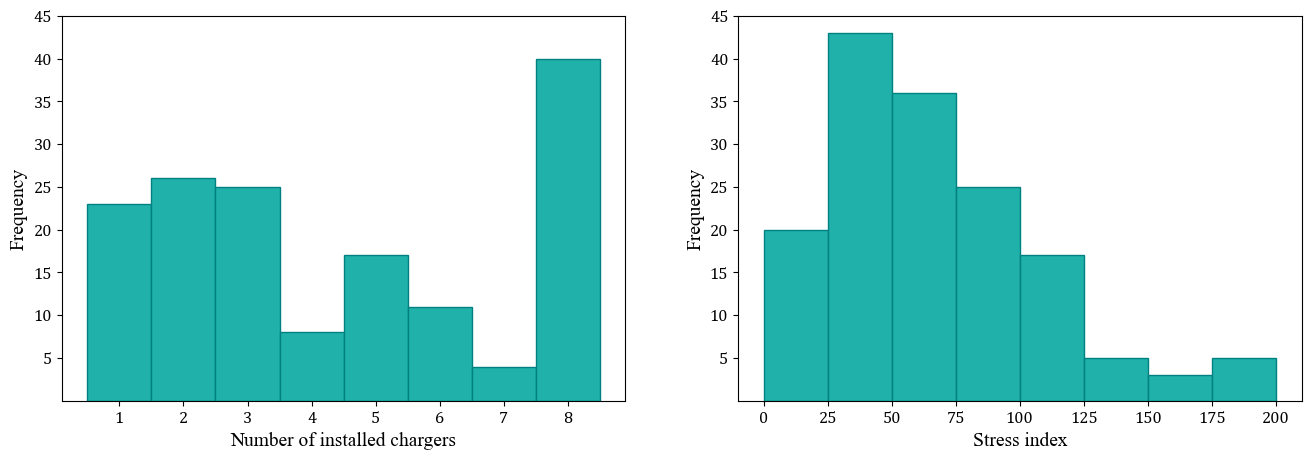

In [16]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,5))

color = "lightseagreen"; edgecolor="teal"; max_y = 45
yticks = [i for i in range(5,46,5)]

chargers = [len([s for s in S if n[s] == i]) for i in range(1,9)]
axes[0].bar(range(1,9),chargers,width=1,color=color,edgecolor=edgecolor)
axes[0].set_ylim(0,max_y)
axes[0].set_yticks(yticks); axes[0].set_yticklabels(yticks,fontname="Cambria",fontsize=12)
ticks = list(range(1,9)); axes[0].set_xticks(ticks); axes[0].set_xticklabels(ticks, fontname="Cambria", fontsize=12)
axes[0].set_xlabel("Number of installed chargers", fontname="Times New Roman",fontsize=14)
axes[0].set_ylabel("Frequency",fontname="Times New Roman",fontsize=14)

bins = [i for i in range(0,201,25)]
axes[1].hist(stress.values(),bins=bins,color=color,edgecolor=edgecolor)
axes[1].set_ylim(0,max_y)
axes[1].set_yticks(yticks); axes[1].set_yticklabels(yticks,fontname="Cambria",fontsize=12)
axes[1].set_xticks(bins); axes[1].set_xticklabels(bins,fontname="Cambria",fontsize=12)
axes[1].set_xlabel("Stress index", fontname="Times New Roman",fontsize=14)
axes[1].set_ylabel("Frequency",fontname="Times New Roman",fontsize=14)

plt.savefig(path+"/Results/Number of chargers.png",dpi=300,bbox_inches="tight")